In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SVI\AppData\Local\Temp\ipykernel_412508\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# importing the dataset
df_train = pd.read_csv("train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# import test data
df_test = pd.read_csv("test.csv")

In [4]:
# merge both train and test data
df = pd.concat([df_train,df_test], ignore_index=True)

In [5]:
df.shape

(783667, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
# delete useID beacuse it is a unique id to the users so just delete it
df.drop(['User_ID'],axis=1,inplace=True)

In [10]:
# - Numerical = Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2, Product_Category_3,Purchase
# - categorical = Age,Gender,City_category,Marital_Status

In [11]:
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [12]:
## handle categorical feature AGE
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [14]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


<Axes: ylabel='Age'>

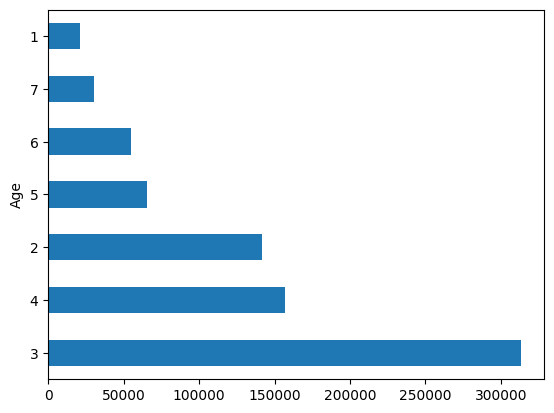

In [15]:
df['Age'].value_counts().plot(kind='barh')

### Observation
- age group 26-35 has the highest number of orders

In [16]:
df_city = pd.get_dummies(df['City_Category'],drop_first=True)

In [17]:
df = pd.concat([df,df_city],axis=1)

In [18]:

df['B_city'] = df['B'].map({False:0,True:1})
df['C_city'] = df['C'].map({False:0,True:1})

In [19]:
df = df.drop({'City_Category','B','C'},axis=1)

In [20]:
df.head(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B_city,C_city
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [21]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B_city                             0
C_city                             0
dtype: int64

### if there is any continuous or discrete feature and missing just replace it with the MODE.

In [22]:
# focus on replacing the missing values
# product_2 and product_3 we will replace missing values with mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [23]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [24]:
# convert object into int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B_city                      783667 non-null  int64  
 11  C_city                      783667 non-null  int64  
dtypes: float64(3), int32(1), int64(7), object(1)
memory usage: 68.8+ MB


In [26]:
df.drop('Product_ID',axis=1,inplace=True)

<Axes: xlabel='Age', ylabel='Purchase'>

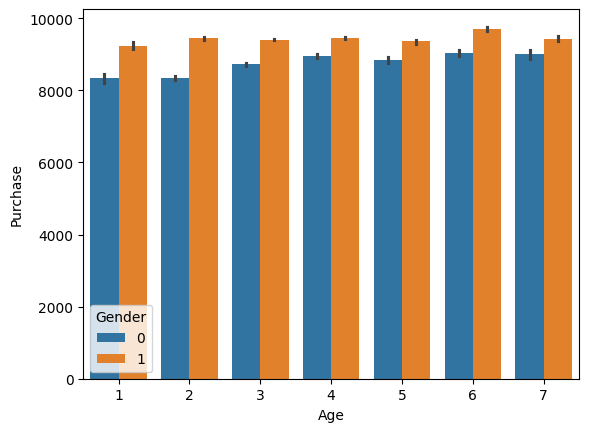

In [27]:
sns.barplot(data=df,x='Age',y='Purchase',hue='Gender')

<Axes: xlabel='Occupation', ylabel='Purchase'>

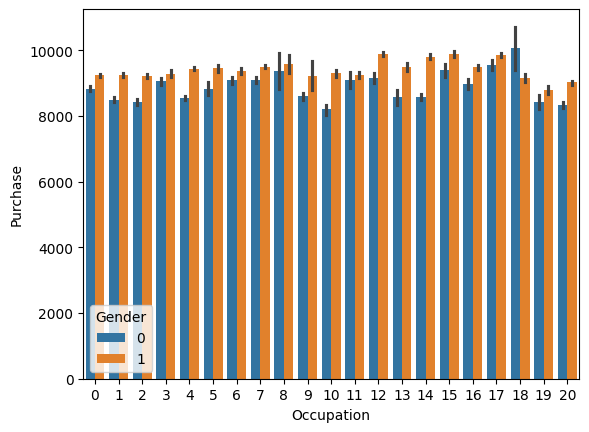

In [28]:
sns.barplot(data=df,x='Occupation',y='Purchase',hue='Gender')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

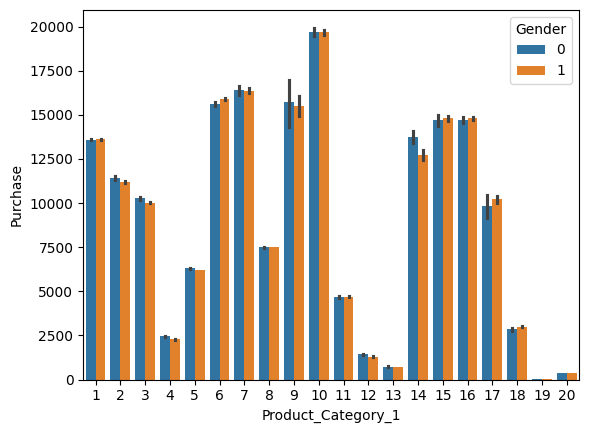

In [29]:
sns.barplot(data=df,x='Product_Category_1',y='Purchase',hue='Gender')

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

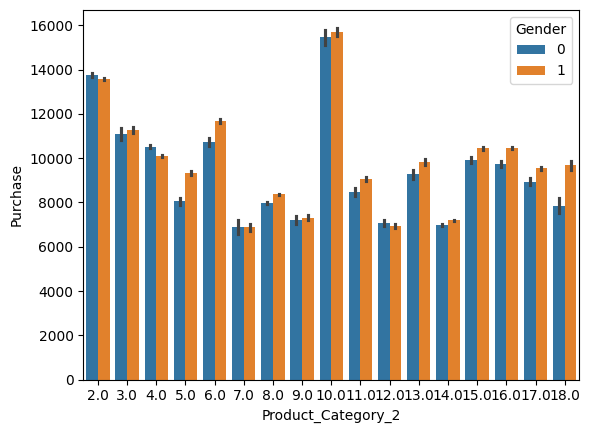

In [30]:
sns.barplot(data=df,x='Product_Category_2',y='Purchase',hue='Gender')

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

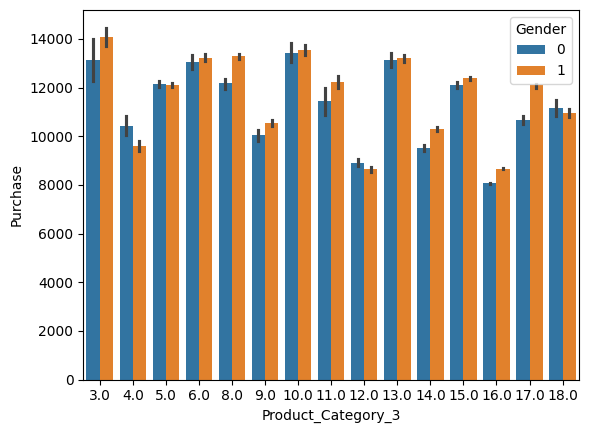

In [31]:
sns.barplot(data=df,x='Product_Category_3',y='Purchase',hue='Gender')

In [32]:
## feature scaling
df_test = df[df['Purchase'].isnull()]

In [33]:
df_train = df[~df['Purchase'].isnull()]

In [34]:
X = df_train.drop('Purchase',axis=1)

In [35]:
y = df_train['Purchase']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [37]:
## feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn.svm import SVC
# Create an SVM classifier
classifier = SVC(kernel='linear', random_state=42)


In [40]:
# Train the classifier on the training data
classifier.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

NameError: name 'y_pred' is not defined